# Lab 10 - Further Applications of Matrix Models

In [1]:
import math, numpy
from matplotlib import pyplot
from scipy import signal

In [2]:
def combination(rows, cols):
    rows = int(rows)
    cols = int(cols)
    return int(math.factorial(rows) / (math.factorial(cols) * math.factorial(abs(rows - cols))))

In [3]:
def pascal_triangle(nrows):
    triangle = []

    for row in range(nrows):
        triangle_row = []

        for col in range(row + 1):
            triangle_row.append(combination(row, col))

        triangle.append(triangle_row)
    
    return triangle

In [4]:
def gen_kernel(size):
    size = int(size)
    FACTOR = 1 / (2 ** (size - 1))
    KERNEL_1 = numpy.array(pascal_triangle(size)[-1]).reshape((1, -1))
    KERNEL_2 = numpy.transpose(KERNEL_1)
    return numpy.array(FACTOR * KERNEL_1 * FACTOR * KERNEL_2)

In [5]:
def convolve_image(img, kernel_size):
    KERNEL = gen_kernel(kernel_size)
    return signal.fftconvolve(img, KERNEL[:, :, numpy.newaxis], mode="same")

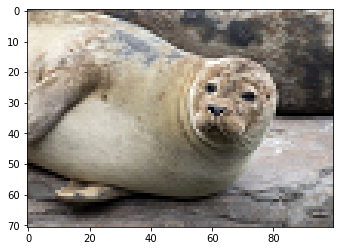

In [6]:
img = pyplot.imread("Resources/Lab 10.png")
pyplot.figure()
pyplot.imshow(img)

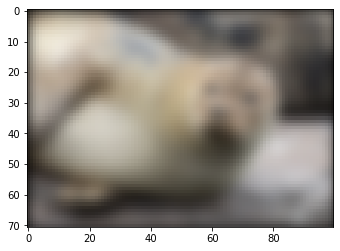

In [7]:
convolved_img = convolve_image(img, 20)
pyplot.imshow(convolved_img)